## Step 0: Load Udacity Training Images.

In [1]:
import cv2
import pandas as pd

# Defining Columns names and importing CSV file.
root_path = './data/'
colnames  = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
dataset   = pd.read_csv(root_path + 'driving_log.csv', skiprows=[0], names=colnames)

# Listing values for each of the images' paths and steering angle.
center_path  = dataset.center.tolist()
left_path    = dataset.left.tolist()
right_path   = dataset.right.tolist()
center_steer = dataset.steering.tolist()

# Define function for loading images.
def loadimg(img_path):
    srcBGR  = cv2.imread(root_path + img_path.replace(' ', ''))
    destRGB = cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB) 
    return destRGB

## Step 1: Dataset Summary & Exploration

### Dataset sumary

In [2]:
import numpy as np

# Obtain the number of images in each set
n_center_img = np.shape(center_path)
n_left_img   = np.shape(left_path)
n_right_img  = np.shape(right_path)

image_shape  = np.shape(loadimg(center_path[0]))

angle_type   = type(center_steer[0])

print("Number of center images =", n_center_img)
print("Number of left images   =", n_left_img)
print("Number of right images  =", n_right_img)
print("Image data shape        =", image_shape)
print("Steering angle type     =", angle_type)

Number of center images = (8036,)
Number of left images   = (8036,)
Number of right images  = (8036,)
Image data shape        = (160, 320, 3)
Steering angle type     = <class 'float'>


### Dataset Visualizations

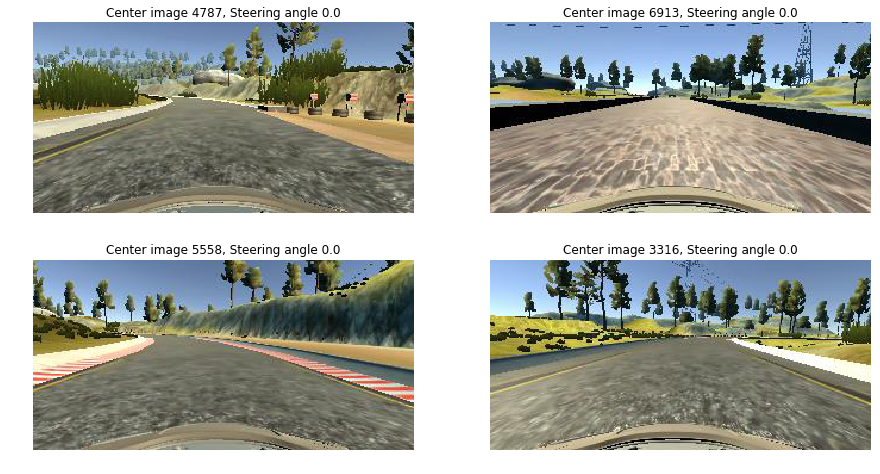

In [3]:
# Import Matplotlib for visualizations.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Let's show 4 random examples in the Center images.
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(center_path))
    image = loadimg(center_path[index])
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title('Center image ' + 
                     str(index) + 
                     ', Steering angle ' + 
                     str(center_steer[index]))

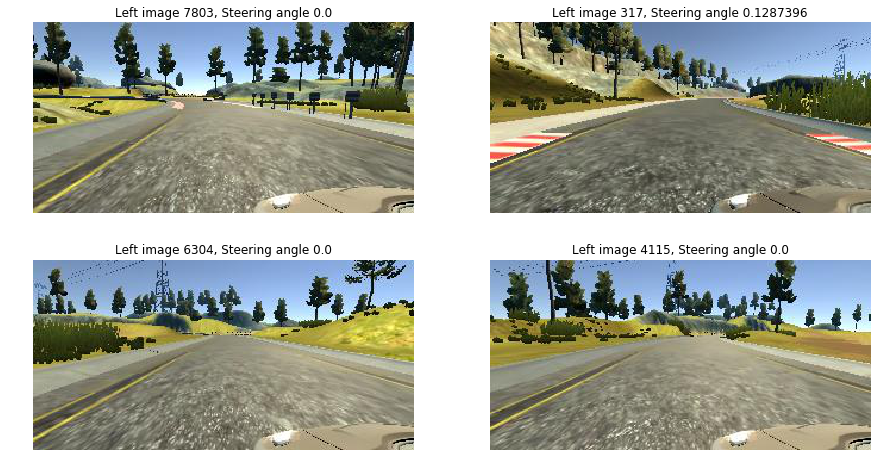

In [4]:
# Let's show 4 random examples in the Left images.
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(left_path))
    image = loadimg(left_path[index])
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title('Left image ' + 
                     str(index) + 
                     ', Steering angle ' + 
                     str(center_steer[index]))

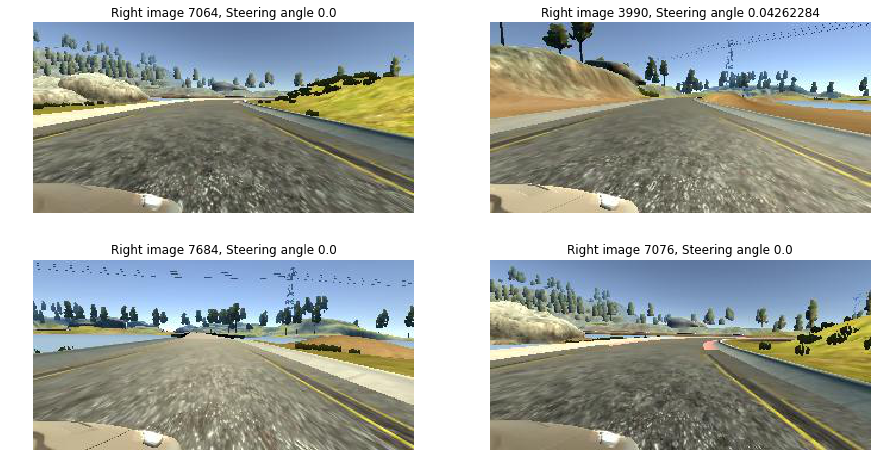

In [5]:
# Let's show 4 random examples in the Right images.
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(right_path))
    image = loadimg(right_path[index])
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title('Right image ' + 
                     str(index) + 
                     ', Steering angle ' + 
                     str(center_steer[index]))

### Dataset distribution

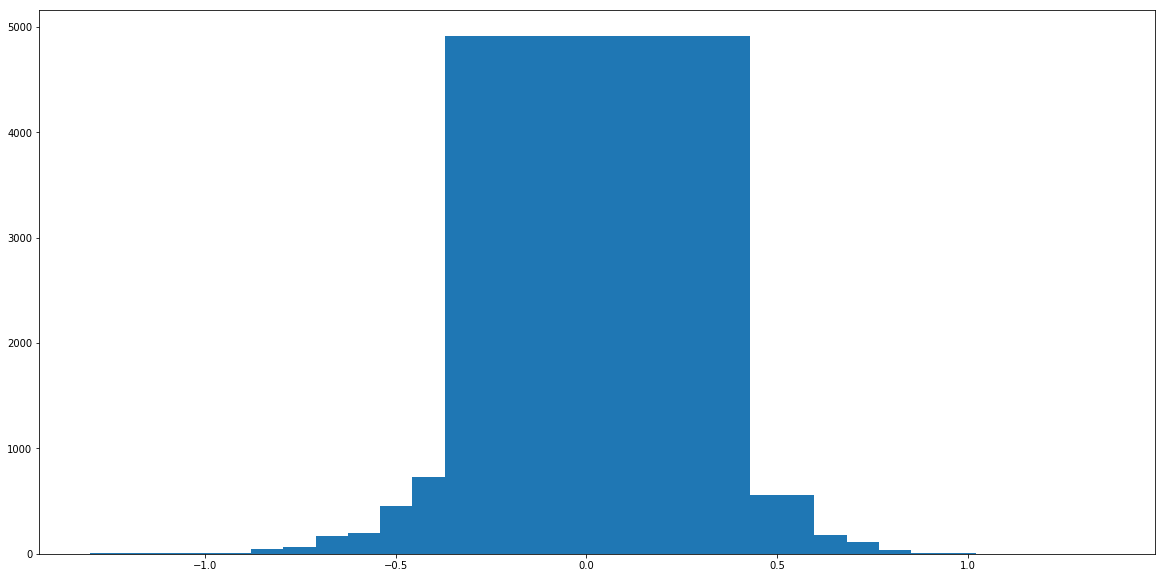

In [6]:
# Plot histogram distribution of the steering angles.
num_bins = 23
hist, bins = np.histogram(center_steer, num_bins)
center = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize = (20, 10))
plt.bar(center, hist)
plt.show()

## Step 2: Data pre-processing and augmentation

In [7]:
# First step is to correct steering angles in side cameras.
left_steer  = []
right_steer = []

# Correcting left images with +0.25 constant.
for angle in center_steer:
    left_steer.append(angle + 0.25)

# Correcting Right images with -0.25 constant.
for angle in center_steer:
    right_steer.append(angle - 0.25)

In [8]:
# To augment dataset in a first step is necesary to flip 
# images in the vertical axis and invert angle value (multiply by -1.0)
inv_steer      = []
inv_img_path   = []

def flipimg(img):
    inv_img = cv2.flip(img, 1)
    return inv_img

# Generating with Center images.
for index, path in enumerate(center_path):
    img_path = path
    steering = center_steer[index]
    steering = -steering
    
    inv_img_path.append(img_path)
    inv_steer.append(steering)
    
# Generating with Left images.
for index, path in enumerate(left_path):
    img_path = path
    steering = left_steer[index]
    steering = -steering
    
    inv_img_path.append(img_path)
    inv_steer.append(steering)
    
# Generating with Right images.
for index, path in enumerate(right_path):
    img_path = path
    steering = right_steer[index]
    steering = -steering
    
    inv_img_path.append(img_path)
    inv_steer.append(steering)

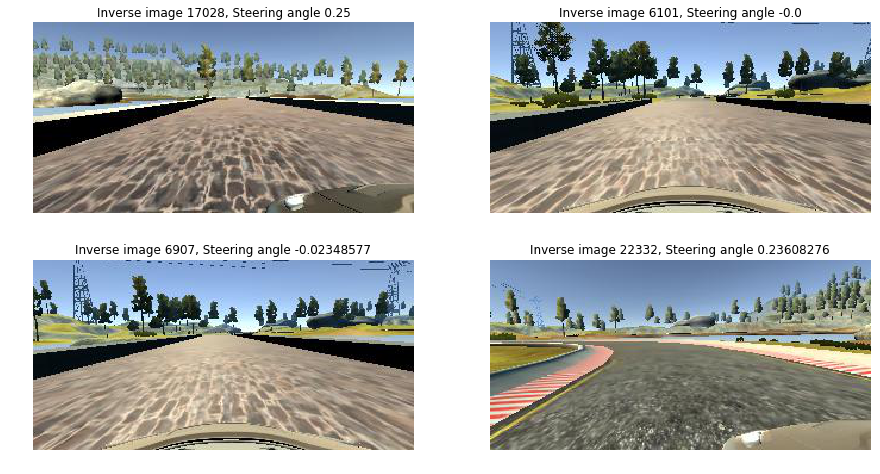

In [9]:
# Let's show 4 random examples in the Inverse images.
fig, axs = plt.subplots(2,2, figsize=(15, 8))
axs = axs.ravel()
for i in range(4):
    index = random.randint(0, len(inv_img_path))
    image = flipimg(loadimg(inv_img_path[index]))
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title('Inverse image ' + 
                     str(index) + 
                     ', Steering angle ' + 
                     str(inv_steer[index]))

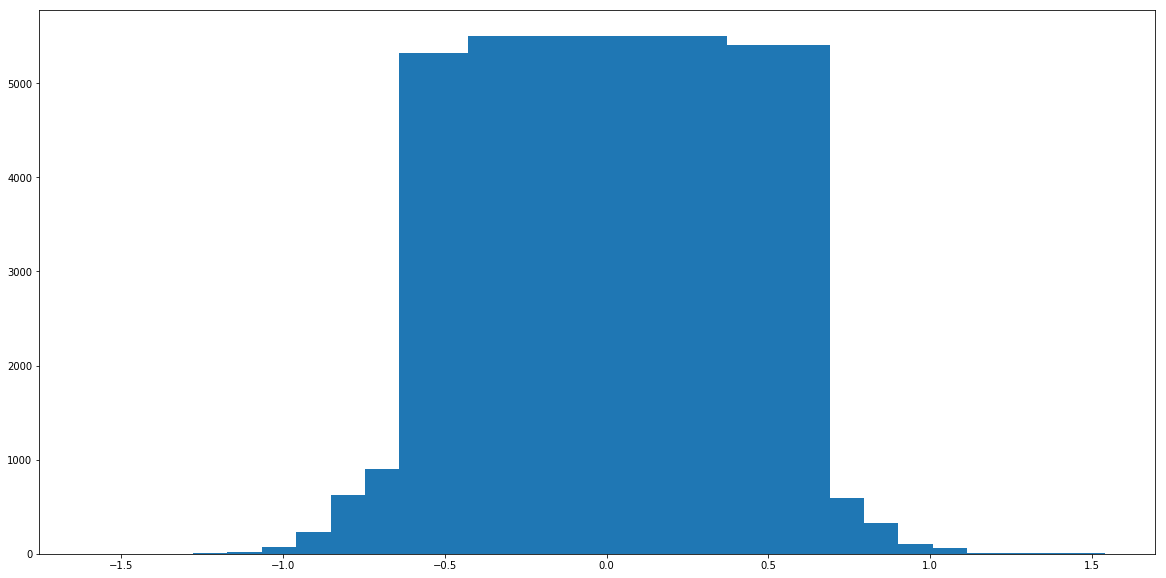

In [10]:
# Plot histogram distribution of the inverse steering angles.
hist, bins = np.histogram(inv_steer, num_bins)
center = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize = (20, 10))
plt.bar(center, hist)
plt.show()

In [11]:
# Time to merge all datasets into a single one.
img_path   = center_path + left_path + right_path
steer = center_steer + left_steer + right_steer

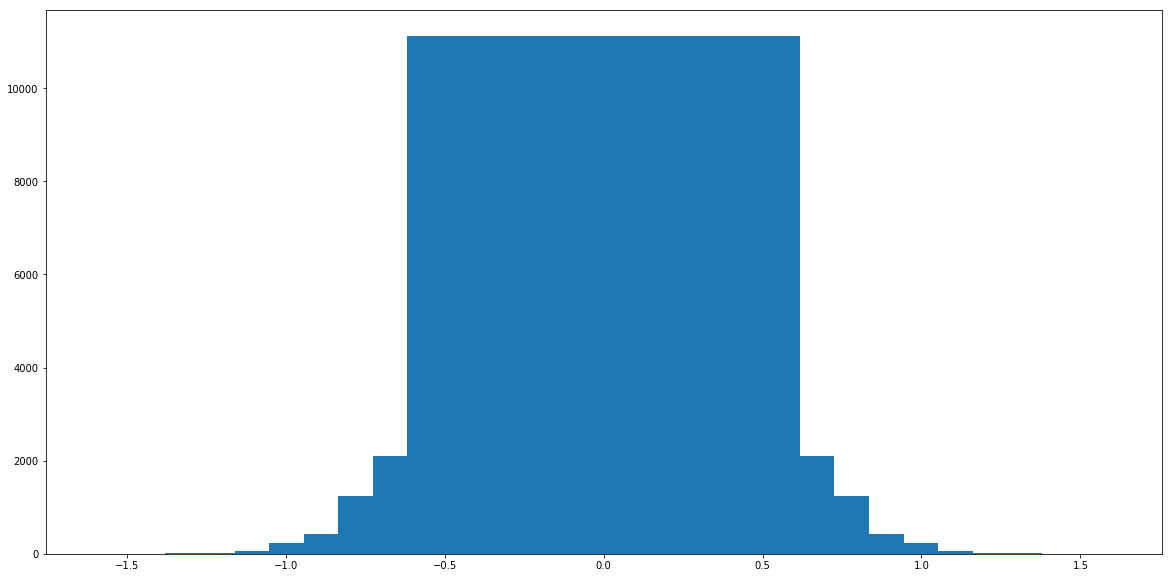

In [12]:
# Plot histogram distribution of all dataset steering angles.
steer_dataset = np.concatenate((steer, inv_steer))
hist, bins = np.histogram(steer_dataset, num_bins)
center = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize = (20, 10))
plt.bar(center, hist)
plt.show()

In [13]:
# Now time to get rid of some samples in order to get a more uniform
# distribution.
keep_probs      = []
remove_list     = []
inv_remove_list = []
target = 2000

repeated_img   = []
repeated_steer = []

inv_repeated_img   = []
inv_repeated_steer = []

# Calculating keep probability base on maximum target.
for i in range(num_bins):
    if hist[i] < target:
        keep_probs.append(1.)
    else:
        keep_probs.append(1./(hist[i]/target))

# Black list for deleted images.
for i in range(num_bins):
    img_indices     = np.where((steer > bins[i])     & (steer <= bins[i + 1]))
    inv_img_indices = np.where((inv_steer > bins[i]) & (inv_steer <= bins[i + 1]))
    
    if keep_probs[i] < 1.0:        
        # delete from X and y with probability 1 - keep_probs[i]
        for index in img_indices[0]:
            if np.random.rand() > keep_probs[i]:
                remove_list.append(index)
                
        for index in inv_img_indices[0]:
            if np.random.rand() > keep_probs[i]:
                inv_remove_list.append(index)
    else:
        for j in range(int((target - hist[i]) / hist[i])):
            for index in img_indices[0]:
                repeated_img.append(img_path[index])
                repeated_steer.append(steer[index])
                
        for j in range(int((target - hist[i]) / hist[i])):
            for index in inv_img_indices[0]:
                inv_repeated_img.append(inv_img_path[index])
                inv_repeated_steer.append(inv_steer[index])
                
# Adjusting datasets.
img_path     = np.delete(img_path,     remove_list)
inv_img_path = np.delete(inv_img_path, inv_remove_list)
steer        = np.delete(steer,        remove_list)
inv_steer    = np.delete(inv_steer,    inv_remove_list)

img_path     = np.concatenate((img_path, repeated_img))
inv_img_path = np.concatenate((inv_img_path, inv_repeated_img))
steer        = np.concatenate((steer, repeated_steer))
inv_steer    = np.concatenate((inv_steer, inv_repeated_steer))

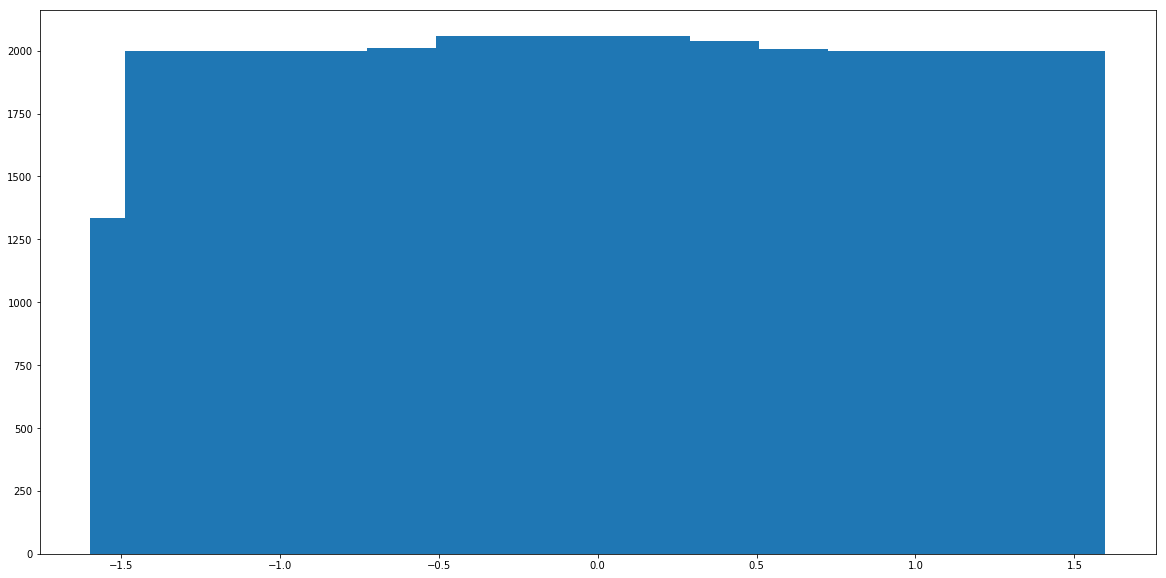

In [14]:
# Plot histogram distribution of all dataset steering angles.
steer_dataset = np.concatenate((steer, inv_steer))
hist, bins = np.histogram(steer_dataset, num_bins)
center = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize = (20, 10))
plt.bar(center, hist)
plt.show()

In [15]:
def preprocess_image(img):
    new_img = img[50:140,:,:]
    new_img = cv2.resize(new_img,(64, 64), interpolation = cv2.INTER_AREA)
    return new_img

In [16]:
# Defining a Keras Data Generator.
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2)

Using TensorFlow backend.


## Step 3: Design and Test a Model Architecture

In [17]:
# Importing Keras layers and utilities.
from keras.models import Sequential, Model, model_from_json
from keras.layers import Input, Dense, Activation, Flatten, Dropout, Lambda, merge
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.regularizers import l2
from keras.optimizers import Adam

# Defining model.
l0_inputs  = Input(shape = (64, 64, 3), name = "L0_INPUT")

l1_lambda  = Lambda(lambda x: x/255 - 0.5, name = "L1_LAMBDA")(l0_inputs)
l1_conv1x1 = Convolution2D(1, 1, 1, border_mode='same', W_regularizer = l2(0.0001), name = "L1_CONV1X1")(l1_lambda)
l1_conv3x3 = Convolution2D(4, 3, 3, border_mode='same', W_regularizer = l2(0.0001), name = "L1_CONV3X3")(l1_lambda)
l1_conv5x5 = Convolution2D(3, 5, 5, border_mode='same', W_regularizer = l2(0.0001), name = "L1_CONV5X5")(l1_lambda)
l1_merge   = merge([l1_conv1x1, l1_conv3x3, l1_conv5x5], mode = 'concat', name = "L1_CONCAT")
l1_activ   = Activation('relu', name = "L1_RELU")(l1_merge)
l1_maxpool = MaxPooling2D(pool_size=(2, 2), name = "L1_MAXPOOL")(l1_activ)
l1_dropout = Dropout(0.5, name = "L1_DROPOUT")(l1_maxpool)

l2_conv1x1 = Convolution2D(2, 1, 1, border_mode='same', W_regularizer = l2(0.0001), name = "L2_CONV1X1")(l1_dropout)
l2_conv3x3 = Convolution2D(8, 3, 3, border_mode='same', W_regularizer = l2(0.0001), name = "L2_CONV3X3")(l1_dropout)
l2_conv5x5 = Convolution2D(6, 5, 5, border_mode='same', W_regularizer = l2(0.0001), name = "L2_CONV5X5")(l1_dropout)
l2_merge   = merge([l2_conv1x1, l2_conv3x3, l2_conv5x5], mode = 'concat', name = "L2_CONCAT")
l2_activ   = Activation('relu', name = "L2_RELU")(l2_merge)
l2_maxpool = MaxPooling2D(pool_size=(2, 2), name = "L2_MAXPOOL")(l2_activ)
l2_dropout = Dropout(0.5, name = "L2_DROPOUT")(l2_maxpool)

l3_conv1x1 = Convolution2D(4,  1, 1, border_mode='same', W_regularizer = l2(0.0001), name = "L3_CONV1X1")(l2_dropout)
l3_conv3x3 = Convolution2D(16, 3, 3, border_mode='same', W_regularizer = l2(0.0001), name = "L3_CONV3X3")(l2_dropout)
l3_conv5x5 = Convolution2D(12, 5, 5, border_mode='same', W_regularizer = l2(0.0001), name = "L3_CONV5X5")(l2_dropout)
l3_merge   = merge([l3_conv1x1, l3_conv3x3, l3_conv5x5], mode = 'concat', name = "L3_CONCAT")
l3_activ   = Activation('relu', name = "L3_RELU")(l3_merge)
l3_maxpool = MaxPooling2D(pool_size=(2, 2), name = "L3_MAXPOOL")(l3_activ)
l3_dropout = Dropout(0.5, name = "L3_DROPOUT")(l3_maxpool)

l4_conv1x1 = Convolution2D(8,  1, 1, border_mode='same', W_regularizer = l2(0.0001), name = "L4_CONV1X1")(l3_dropout)
l4_conv3x3 = Convolution2D(32, 3, 3, border_mode='same', W_regularizer = l2(0.0001), name = "L4_CONV3X3")(l3_dropout)
l4_conv5x5 = Convolution2D(24, 5, 5, border_mode='same', W_regularizer = l2(0.0001), name = "L4_CONV5X5")(l3_dropout)
l4_merge   = merge([l4_conv1x1, l4_conv3x3, l4_conv5x5], mode = 'concat', name = "L4_CONCAT")
l4_activ   = Activation('relu', name = "L4_RELU")(l4_merge)
l4_maxpool = MaxPooling2D(pool_size=(2, 2), name = "L4_MAXPOOL")(l4_activ)
l4_dropout = Dropout(0.5, name = "L4_DROPOUT")(l4_maxpool)

l5_conv1x1 = Convolution2D(16, 1, 1, border_mode='same', W_regularizer = l2(0.0001), name = "L5_CONV1X1")(l4_dropout)
l5_flatten = Flatten(name = "L5_FLATTEN")(l5_conv1x1)
l5_dense1  = Dense(name = "L5_DENSE1", output_dim = 64, W_regularizer = l2(0.0001), activation = 'relu')(l5_flatten)
l5_dense2  = Dense(name = "L5_DENSE2", output_dim = 32, W_regularizer = l2(0.0001), activation = 'relu')(l5_dense1)
l5_dense3  = Dense(name = "L5_DENSE3", output_dim = 1,  W_regularizer = l2(0.0001), activation = 'tanh')(l5_dense2)

steer_angle = Model(l0_inputs, l5_dense3)
steer_angle.summary()

steer_angle.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
L0_INPUT (InputLayer)            (None, 64, 64, 3)     0                                            
____________________________________________________________________________________________________
L1_LAMBDA (Lambda)               (None, 64, 64, 3)     0           L0_INPUT[0][0]                   
____________________________________________________________________________________________________
L1_CONV1X1 (Convolution2D)       (None, 64, 64, 1)     4           L1_LAMBDA[0][0]                  
____________________________________________________________________________________________________
L1_CONV3X3 (Convolution2D)       (None, 64, 64, 4)     112         L1_LAMBDA[0][0]                  
___________________________________________________________________________________________

In [18]:
# loading images for training.
img_dataset = []

for path in img_path:
    img = loadimg(path)
    img = preprocess_image(img)
    img_dataset.append(img)
    
for path in inv_img_path:
    img = loadimg(path)
    img = flipimg(img)
    img = preprocess_image(img)
    img_dataset.append(img)

Number of center images = (8036,)
Number of left images   = (8036,)


In [20]:
n_img_dataset   = np.shape(img_dataset)
n_steer_dataset = np.shape(steer_dataset)

print("Number of images          =", n_img_dataset)
print("Number of steering angles =", n_steer_dataset)

Number of images          = (42832, 64, 64, 3)
Number of steering angles = (42832,)


In [21]:
epochs = 10
img_dataset   = np.asarray(img_dataset)
steer_dataset = np.clip(steer_dataset, -1.0, 1.0)

datagen.fit(img_dataset)

history = steer_angle.fit_generator(datagen.flow(img_dataset, steer_dataset, batch_size = 32),
                                    samples_per_epoch = 32000 , nb_epoch = epochs)

Epoch 1/10
 1056/32000 [..............................] - ETA: 1588s - loss: 0.3677 - acc: 0.1042

KeyboardInterrupt: 

In [ ]:
model_json = steer_angle.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)
steer_angle.save_weights("./model/model.h5")